# Gradients.

$$
\text{Gradient:} \quad \nabla f = \left( \frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y},\ \frac{\partial f}{\partial z},\ \ldots \right)
$$

$$
\text{Example:} \quad f(x, y) = x^2 + y^2
$$

$$
\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 2y
$$

$$
\nabla f = (2x,\ 2y)
$$


In [35]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

$$f(x,y) = x \times exp(-(x^2 + y^2))$$


In [97]:
x, y = sym.symbols("x y", real=True)
fxy = x * sym.exp(-(x**2 + y**2))
# another test functions
# fxy = sym.sin(x**2 + y) + sym.cos(y)
# fxy = sym.exp(-sym.Abs(x * y))
f_x = sym.diff(fxy, x)
f_y = sym.diff(fxy, y)

FXY = sym.lambdify((x, y), fxy)
F_X = sym.lambdify((x, y), f_x)
F_Y = sym.lambdify((x, y), f_y)

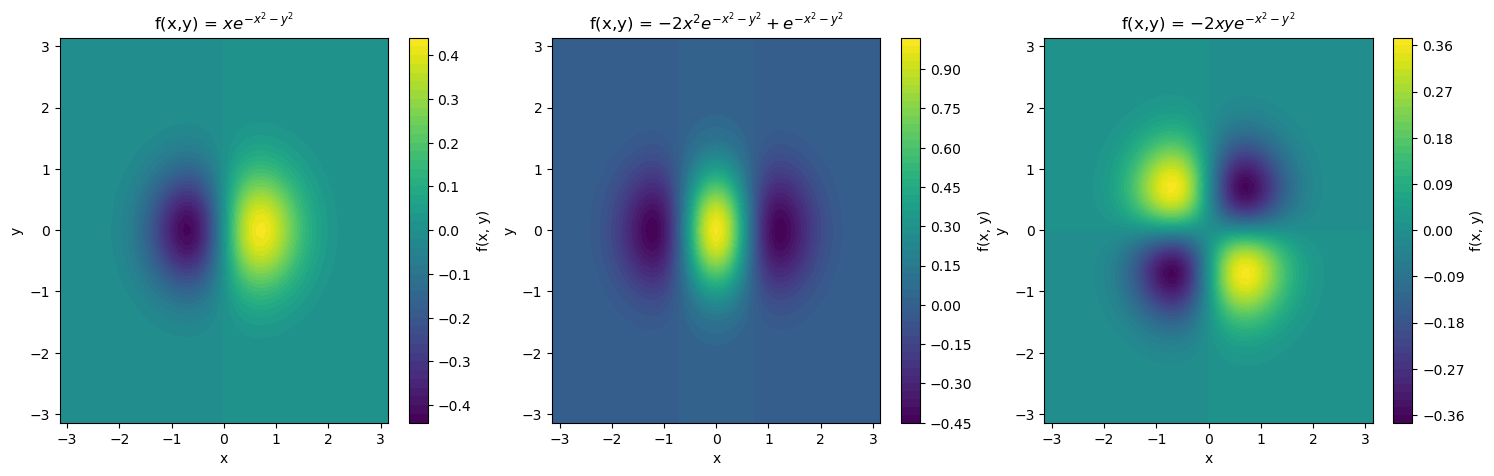

In [109]:
N = 51
xx = np.linspace(-np.pi, np.pi, N)
X, Y = np.meshgrid(xx, xx)
Z1 = FXY(X, Y)
Z2 = F_X(X, Y)
Z3 = F_Y(X, Y)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

contour = axes[0].contourf(X, Y, Z1, levels=50, cmap="viridis")
fig.colorbar(contour, ax=axes[0], label="f(x, y)")
axes[0].set_title(f"f(x,y) = ${sym.latex(fxy)}$")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

contour = axes[1].contourf(X, Y, Z2, levels=50, cmap="viridis")
fig.colorbar(contour, ax=axes[1], label="f(x, y)")
axes[1].set_title(f"f(x,y) = ${sym.latex(f_x)}$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

contour = axes[2].contourf(X, Y, Z3, levels=50, cmap="viridis")
fig.colorbar(contour, ax=axes[2], label="f(x, y)")
axes[2].set_title(f"f(x,y) = ${sym.latex(f_y)}$")
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")

plt.show()

## Gradient Fields.


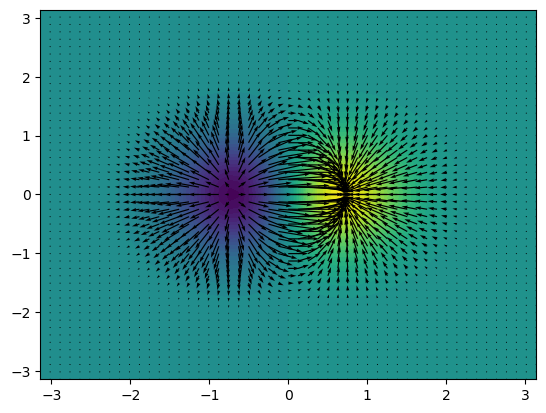

In [110]:
# using sympy
plt.contourf(X, Y, Z1, levels=50, cmap="viridis")
plt.quiver(X, Y, Z2, Z3)

plt.show()

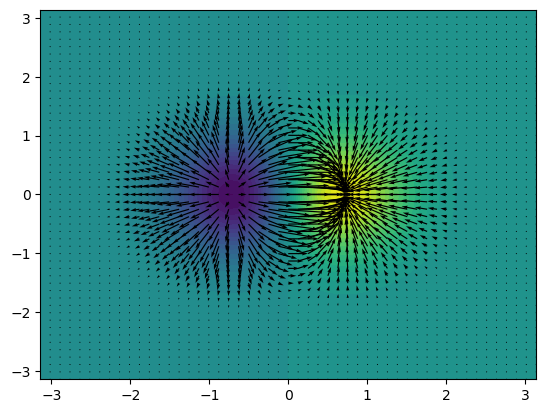

In [111]:
# using numpy
gradx, grady = np.gradient(Z1)

plt.contourf(xx, xx, Z1, 40)
plt.quiver(xx, xx, grady, gradx)

plt.show()

## Climb to the Peak using Gradient.


(51, 51) (51, 51)


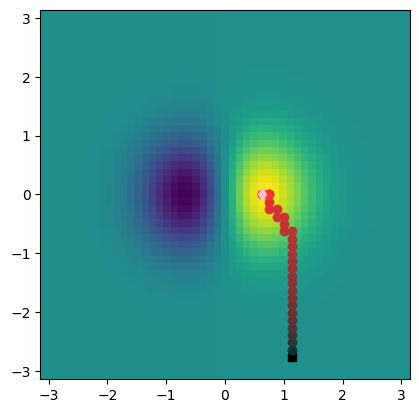

In [ ]:
# start at a random loc
# loc = np.array([12,15]) # note: fixing the start loc is useful for development
loc = np.random.choice(np.arange(N), 2)

nIterations = 30

# combine gradient maps for convenience
G = np.concatenate((gradx[None], grady[None]), axis=0)

plt.imshow(Z1, origin="lower", extent=[xx[0], xx[-1], xx[0], xx[-1]])
plt.plot(xx[loc[1]], xx[loc[0]], "ks")


# algorithm loop
for i in range(nIterations):
    # find maximum directions, argmax returns the index
    dirXY = np.argmax(np.abs(G[:, loc[0], loc[1]]))
    dirUD = np.sign(G[dirXY, loc[0], loc[1]])

    # move the particle along that direction
    if dirXY == 0:
        loc[0] += dirUD
    elif dirXY == 1:
        loc[1] += dirUD

    # possibly fix boundaries
    loc[0] = np.max((0, loc[0]))
    loc[0] = np.min((N - 1, loc[0]))

    loc[1] = np.max((0, loc[1]))
    loc[1] = np.min((N - 1, loc[1]))

    # update the plot
    plt.plot(xx[loc[1]], xx[loc[0]], "o", color=[np.sqrt(i / nIterations), 0.2, 0.2])


# pink diamond at the end of the trajectory
plt.plot(xx[loc[1]], xx[loc[0]], "d", color="pink")
plt.show()